In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np

# for graphing
import matplotlib.pyplot as plt
import seaborn as sns

# regression libraries (sklearn) will be imported in the process to maintain an overview of when we need what

## Introduction
1. We have a target, therefore we use supervised learning. 
2. As we are seeking out a categorical value as a target (intiger and categroical scale), we cannot perform a regression analysis. We will go with a classification model
3. We know about and feel comfortable with the following classification models: <br>
    3.1. Decision Tree <br>
    3.2. Logisitc Regression** <br>
    3.3. KNN <br>


** Logisitc Regression is only used when we have one dependent variable and one independent variables. To carry this type of model out for multiple variables, we would need to do a mulitnominal or ordinal regression, however, we are not comfortable with these, so we will not attempt them on our first go. 

#### Models
we will use:
- decision tree
- KNN

#### Metrics
we will use:
- confusion matrix
- f1
- recall
- precision
- accuracy

#### To check our hyperparameters and their performance when fitting the model we will use a grid search (if we have time)

In [2]:
df = pd.read_csv("../Data/cleaned_cookie_data.csv", index_col=0)

In [3]:
df.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor
0,0.25,9.5,300,15.0,136.0,8.10,0.44,12.1,8,melted,15.2,raisins,1.30
1,0.23,3.3,520,34.0,113.0,8.16,0.48,8.4,7,melted,12.4,raisins,1.71
2,0.18,1.9,360,33.0,106.0,8.21,0.83,14.0,9,melted,9.4,"nuts, chocolate",1.78
3,0.18,10.5,490,41.0,124.0,8.14,0.35,10.5,7,melted,12.2,chocolate,1.59
4,0.24,2.4,770,6.0,33.0,8.09,0.57,9.4,5,cubed,19.8,"nuts, oats, chocolate",1.30


## Pre-processing
For preprocessing we will do the following:
- encoding categorical variables
- define X and y
- split into train and test (we chose a 80:20 ratio)

##### Encoding, dummy variables for mixins

In [4]:
df["mixins"].value_counts().index

Index(['chocolate', 'raisins', 'chocolate, oats', 'nuts, chocolate',
       'nuts,raisins', 'nuts, oats, chocolate', 'nuts, oats',
       'chocolate, peanut butter', 'raisins, oats', 'peanut butter', 'oats',
       'No mixins', 'chocolate, oats, peanut butter'],
      dtype='object')

In [5]:
# create dummy variables
mixes = ['raisins', 'chocolate', 'oats', 'nuts', 'peanut butter', 'No mixins']

# Your code here
for i in mixes:
    df[i]=0

In [6]:
# fill dummy
for mix in mixes:
    
    df[mix] = df.mixins.str.contains(mix, regex=False).astype(int)

In [7]:
df.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor,raisins,chocolate,oats,nuts,peanut butter,No mixins
0,0.25,9.5,300,15.0,136.0,8.10,0.44,12.1,8,melted,15.2,raisins,1.30,1,0,0,0,0,0
1,0.23,3.3,520,34.0,113.0,8.16,0.48,8.4,7,melted,12.4,raisins,1.71,1,0,0,0,0,0
2,0.18,1.9,360,33.0,106.0,8.21,0.83,14.0,9,melted,9.4,"nuts, chocolate",1.78,0,1,0,1,0,0
3,0.18,10.5,490,41.0,124.0,8.14,0.35,10.5,7,melted,12.2,chocolate,1.59,0,1,0,0,0,0
4,0.24,2.4,770,6.0,33.0,8.09,0.57,9.4,5,cubed,19.8,"nuts, oats, chocolate",1.30,0,1,1,1,0,0


In [8]:
# drop mixins
df.drop("mixins", axis=1, inplace=True)

##### Encoding, dummy variables for butter

In [9]:
# we only have two types of butter
# we can just replace the values with [1,0] for [melted, cubed] using a repalce funciton
df["butter type"] = np.where(df["butter type"] == "melted", 1, 0)

In [10]:
df.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,pH,grams baking soda,bake time,quality,butter type,weight,crunch factor,raisins,chocolate,oats,nuts,peanut butter,No mixins
0,0.25,9.5,300,15.0,136.0,8.10,0.44,12.1,8,1,15.2,1.30,1,0,0,0,0,0
1,0.23,3.3,520,34.0,113.0,8.16,0.48,8.4,7,1,12.4,1.71,1,0,0,0,0,0
2,0.18,1.9,360,33.0,106.0,8.21,0.83,14.0,9,1,9.4,1.78,0,1,0,1,0,0
3,0.18,10.5,490,41.0,124.0,8.14,0.35,10.5,7,1,12.2,1.59,0,1,0,0,0,0
4,0.24,2.4,770,6.0,33.0,8.09,0.57,9.4,5,0,19.8,1.30,0,1,1,1,0,0


###### Splitting, fitting, training

In [11]:
# Selecting data that are our features and the target variables.
y = df[['quality']]
X = df.drop(columns=['quality'])

In [12]:
# Importing sklearn library for model selection to split between train and test
from sklearn.model_selection import train_test_split

# Splitting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [29]:
### # Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Creating the instance of the Decision Tree with maximum depth equals to 1
#dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1, min_samples_leaf=5)

# Creating the instance of the Decision Tree with maximum depth equals to 1
dtree = DecisionTreeClassifier(max_depth=1, min_samples_leaf=5)

# Fitting the model on train set 
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
# Predicting observation on our test set. 
y_pred = dtree.predict(X_test)

In [31]:
# Calculating and printing the accuracy score between the y_test value and the y_predicted values. 
print(f"Accuracy is: {accuracy_score(y_test,y_pred)}")

Accuracy is: 0.4378818737270876


In [32]:
# Importing the required libraries to calculate the metrics of the ML models we are calculating
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Decision tree classification
print(f"Confusion matrix = \n {confusion_matrix(y_test, y_pred)}")
print(f"precision score = {precision_score(y_test, y_pred, average='micro')}")
print(f"recall = {recall_score(y_test, y_pred, average='micro')}")
print(f"f1 score = {f1_score(y_test, y_pred, average='micro')}")


Confusion matrix = 
 [[  0   4   0   0   0   0   0   0]
 [  0  92   0   0   2   0   0   0]
 [  0  93   0   0  26   0   0   0]
 [  0  17   0   0 226   0   0   0]
 [  0   4   0   0 338   0   0   0]
 [  0   0   0   0 139   0   0   0]
 [  0   0   0   0  39   0   0   0]
 [  0   0   0   0   2   0   0   0]]
precision score = 0.4378818737270876
recall = 0.4378818737270876
f1 score = 0.4378818737270876


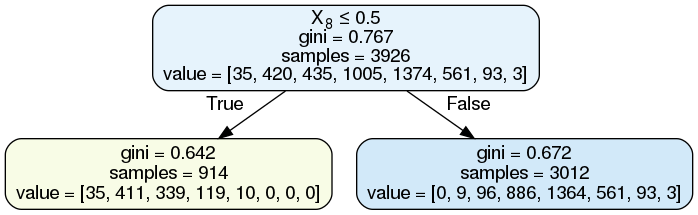

In [33]:
# Drawing the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [18]:
"""from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(false_positive_rate, true_positive_rate)"""

'from sklearn.metrics import roc_curve, auc\n\nfalse_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)\n\nroc_auc = auc(false_positive_rate, true_positive_rate)'

In [19]:
max_depths = np.linspace(1, 20, 20, endpoint=True)

In [20]:
print(max_depths)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


In [34]:
train_results = []
test_results = []
for max_depth in max_depths:
    dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=max_depth, min_samples_leaf=5)
    dtree.fit(X_train, y_train)
    y_pred_train = dtree.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    train_results.append(accuracy_train)
    y_pred = dtree.predict(X_test)
    accuracy_test =accuracy_score(y_test,y_pred)
    test_results.append(accuracy_test)
    

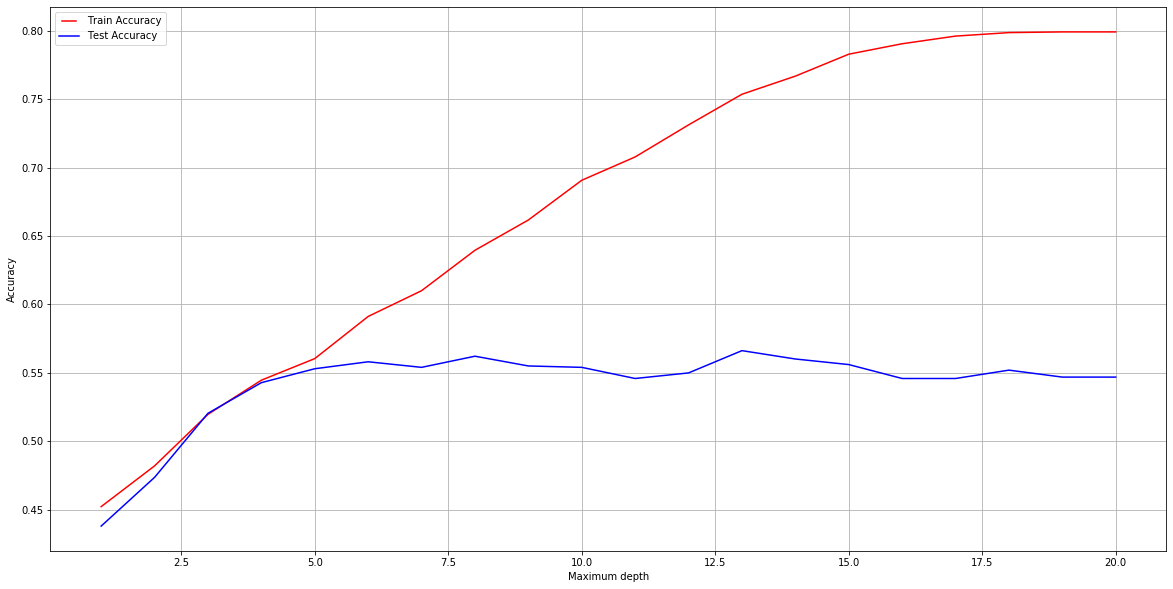

In [38]:
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(20,10))
line1, = plt.plot(max_depths, train_results, "r", label="Train Accuracy")
line2, = plt.plot(max_depths, test_results, "b", label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Maximum depth')
plt.grid()
plt.show()

We see that our model overfits for large depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data

#### Changing the value of min_samples_split hyperparameter

In [42]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

In [45]:
train_results = []
test_results = []
for min_sample in min_samples_splits:
    dtree = DecisionTreeClassifier(min_samples_split=min_sample)
    dtree.fit(X_train, y_train)
    y_pred_train = dtree.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    train_results.append(accuracy_train)
    y_pred = dtree.predict(X_test)
    accuracy_test =accuracy_score(y_test,y_pred)
    test_results.append(accuracy_test)
    

In [46]:
train_results

[0.5537442689760571,
 0.5387162506367804,
 0.4926133469179827,
 0.4793683138053999,
 0.4521141110545084,
 0.4521141110545084,
 0.4521141110545084,
 0.4521141110545084,
 0.4521141110545084,
 0.4521141110545084]

In [47]:
test_results

[0.5376782077393075,
 0.544806517311609,
 0.49490835030549896,
 0.48370672097759676,
 0.4378818737270876,
 0.4378818737270876,
 0.4378818737270876,
 0.4378818737270876,
 0.4378818737270876,
 0.4378818737270876]

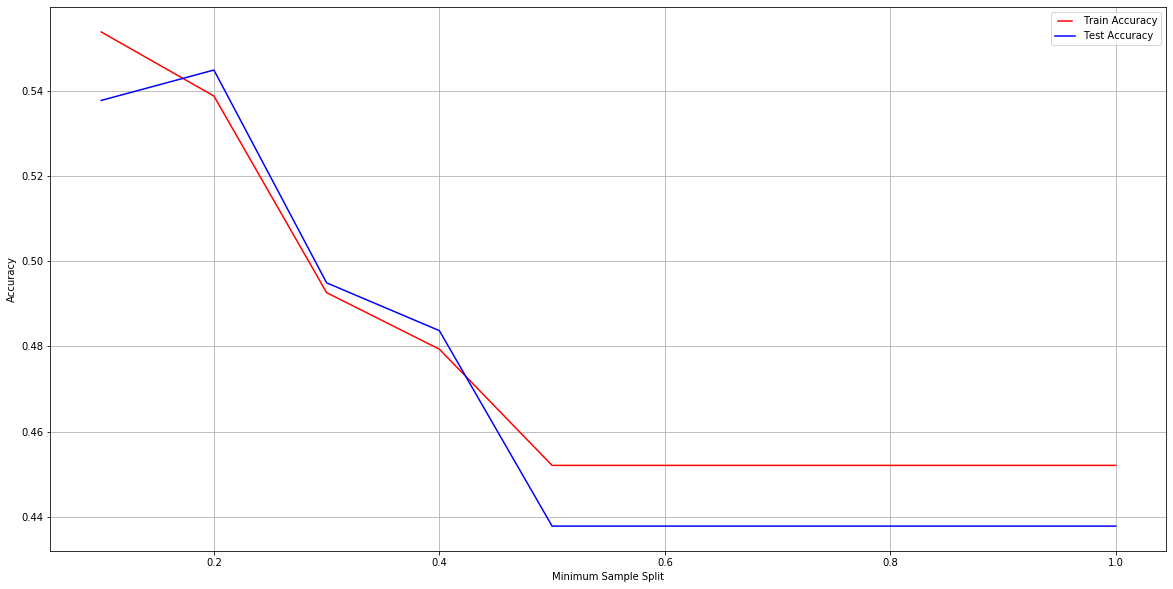

In [48]:
plt.figure(figsize=(20,10))
line1, = plt.plot(min_samples_splits, train_results, "r", label="Train Accuracy")
line2, = plt.plot(min_samples_splits, test_results, "b", label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Minimum Sample Split')
plt.grid()
plt.show()

## Ordinary Least Squares Feature Selection

In [49]:
# Importing the required library to implement the hypotheses testing. 
import statsmodels.api as sm

# Creating the model using statsmodel and passing as a parameters the y_train_column and the X_train_matrix 
mod = sm.OLS(y_train, X_train)

# Fitting the model 
res = mod.fit()

# Printing the results summary 
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          2.406e+04
Date:                Fri, 16 Aug 2019   Prob (F-statistic):                        0.00
Time:                        14:25:14   Log-Likelihood:                         -4317.1
No. Observations:                3926   AIC:                                      8668.
Df Residuals:                    3909   BIC:                                      8775.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

We can see that the F-Statistic is quite high, and by calculating the probability we obtain that it is 0.00 and smaller than the alpha value = 0.05. With this we can reject the null hypotheses and at least one coefficient will be different from 0 in a Linear Regression Model. 

Furthermore, we can see that the R2 score is very high (0.99), meaning that a Linear Regression can be an appropiate model for calculating the cookies' quality. 

However, we have right now a model with 16 features and it can be quite difficult to understand its performance. Also, we can see that some of the variables have a p-value greater than alpha, and therefore they can be removed from the model. 

`Iteration 2`: Removing crunch factor with a p-value = 0.562

In [56]:
X_train2 = X_train.drop(['crunch factor'], axis=1)

In [57]:
# Importing the required library to implement the hypotheses testing. 
import statsmodels.api as sm

# Creating the model using statsmodel and passing as a parameters the y_train_column and the X_train_matrix 
mod = sm.OLS(y_train, X_train2)

# Fitting the model 
res = mod.fit()

# Printing the results summary 
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          2.557e+04
Date:                Fri, 16 Aug 2019   Prob (F-statistic):                        0.00
Time:                        14:40:13   Log-Likelihood:                         -4317.3
No. Observations:                3926   AIC:                                      8667.
Df Residuals:                    3910   BIC:                                      8767.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

`Iteration 3`: Removing 'no mixins' columns

In [58]:
X_train2 = X_train2.drop(['No mixins'], axis=1)

# Importing the required library to implement the hypotheses testing. 
import statsmodels.api as sm

# Creating the model using statsmodel and passing as a parameters the y_train_column and the X_train_matrix 
mod = sm.OLS(y_train, X_train2)

# Fitting the model 
res = mod.fit()

# Printing the results summary 
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          2.728e+04
Date:                Fri, 16 Aug 2019   Prob (F-statistic):                        0.00
Time:                        14:40:20   Log-Likelihood:                         -4317.5
No. Observations:                3926   AIC:                                      8665.
Df Residuals:                    3911   BIC:                                      8759.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

`Iteration 3`: Removing weight

In [59]:
X_train2 = X_train2.drop(['weight'], axis=1)

# Importing the required library to implement the hypotheses testing. 
import statsmodels.api as sm

# Creating the model using statsmodel and passing as a parameters the y_train_column and the X_train_matrix 
mod = sm.OLS(y_train, X_train2)

# Fitting the model 
res = mod.fit()

# Printing the results summary 
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          2.923e+04
Date:                Fri, 16 Aug 2019   Prob (F-statistic):                        0.00
Time:                        14:41:47   Log-Likelihood:                         -4318.1
No. Observations:                3926   AIC:                                      8664.
Df Residuals:                    3912   BIC:                                      8752.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

`Iteration 4`: Removing sugar to flour ratio

In [60]:
X_train2 = X_train2.drop(['sugar to flour ratio'], axis=1)

# Importing the required library to implement the hypotheses testing. 
import statsmodels.api as sm

# Creating the model using statsmodel and passing as a parameters the y_train_column and the X_train_matrix 
mod = sm.OLS(y_train, X_train2)

# Fitting the model 
res = mod.fit()

# Printing the results summary 
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          3.147e+04
Date:                Fri, 16 Aug 2019   Prob (F-statistic):                        0.00
Time:                        14:42:58   Log-Likelihood:                         -4319.2
No. Observations:                3926   AIC:                                      8664.
Df Residuals:                    3913   BIC:                                      8746.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

With this final dataset, we try to perform a linear regression model to predict the quality of the cookie, because we see the R2 score is still quite high in our model. 

In [62]:
# Removing columns that are no longer in our model 

X_test2 = X_test.drop(['crunch factor', 'No mixins', 'weight', 'sugar to flour ratio'], axis=1)

In [63]:
# Importing the r2_score metric to evaluate the performance of the LinearRegression Model 
from sklearn.metrics import r2_score
# Importing all the required libraries to create a Linear Regression Model from Sklearn 
from sklearn.linear_model import LinearRegression

cookies_linear = LinearRegression()

cookies_linear.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
# Predicting the value of our linear regression model 
y_pred = cookies_linear.predict(X_test2)

In [88]:
y_pred_round = np.around(y_pred,0)

y_pred_df = pd.DataFrame(y_pred_round)

In [95]:
y_pred_df[0].value_counts()

8.0    553
7.0    158
6.0    106
5.0     96
9.0     69
Name: 0, dtype: int64

In [101]:
#y_pred_train_linear = cookies_linear.predict(X_train2)

In [103]:
#r2_score(y_train, y_pred_train_linear)

0.6776210783434744

In [99]:
# Calculating the r2_score based on the predicted y and the y_test dataset 
r2_score(y_test, y_pred)

0.6459162728396228

Text(0.5, 1.0, 'Scatter plot for quality target test and predicted values')

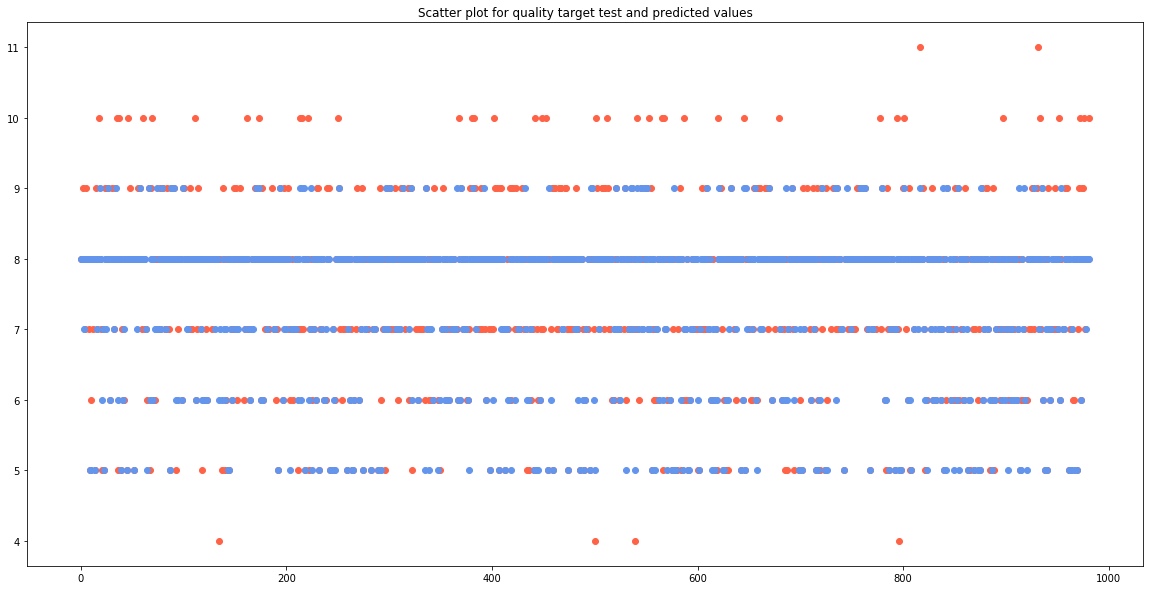

In [86]:
import math

# Setting the figure and creating a figure with figure size (20,10)
plt.figure(figsize=(20,10))

# In the same figure, we will plot the quality target test data and the y_predicted values. 

# Plotting diabetes target test observations 
plt.scatter(range(y_test.shape[0]), y_test, color='tomato')

# Plotting diabetes y predicted values. 
plt.scatter(range(y_pred.shape[0]), y_pred_round, color='cornflowerblue')

# Setting aesthetics of the figure 
plt.title('Scatter plot for quality target test and predicted values')

## Decision Tree with less features 

In [108]:
train_results = []
test_results = []
for max_depth in max_depths:
    dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=max_depth, min_samples_leaf=5)
    dtree.fit(X_train2, y_train)
    y_pred_train = dtree.predict(X_train2)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    train_results.append(accuracy_train)
    y_pred = dtree.predict(X_test2)
    accuracy_test =accuracy_score(y_test,np.around(y_pred))
    test_results.append(accuracy_test)
    

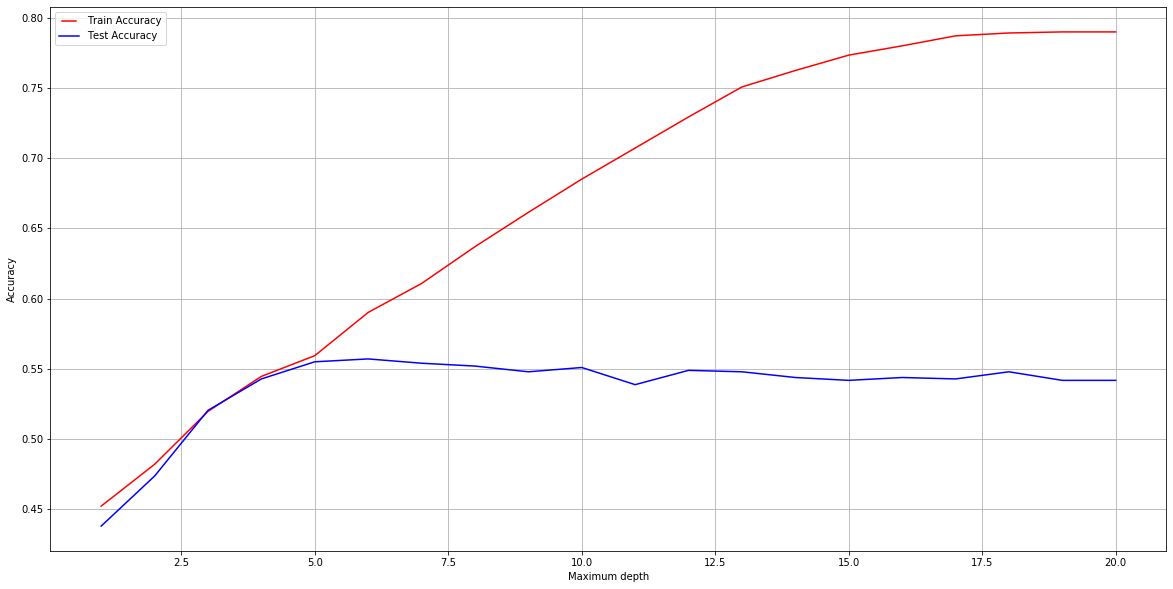

In [109]:
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(20,10))
line1, = plt.plot(max_depths, train_results, "r", label="Train Accuracy")
line2, = plt.plot(max_depths, test_results, "b", label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Maximum depth')
plt.grid()
plt.show()

## Testing Ironhack's Test Set

In [112]:
from sqlalchemy import create_engine


In [111]:
driver = 'mysql+pymysql'
ip = '35.239.232.23'
username = 'ironhacker_read'
password = 'ir0nhack3r'
db = 'cookies'
table = 'cookies_quality'

In [120]:
connection_string = f'{driver}://{username}:{password}@{ip}/{db}'
engine= create_engine(connection_string)


query = """
        SELECT * FROM cookies_evaluate;
"""

In [126]:
cookies_test = pd.read_sql(query, engine)

In [129]:
cookies_test.drop(['index', 'Unnamed: 0'], axis=1, inplace=True)

In [130]:
cookies_test.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.62,19.25,400.0,41.0,172.0,1.0002,7.98,0.67,9.7,0,melted,16.6,7,"nuts, chocolate",1.85,3
1,0.35,1.00,520.0,35.0,146.0,0.9930,8.45,0.44,10.0,0,melted,13.8,7,chocolate,1.43,3
2,0.39,10.40,440.0,20.0,142.0,0.9974,8.20,0.53,10.0,0,melted,17.0,7,chocolate,1.57,3
3,0.33,1.10,570.0,21.0,82.0,0.9910,8.32,0.46,10.9,0,melted,12.4,7,"chocolate, oats",1.44,3
4,0.37,13.50,600.0,52.0,192.0,0.9975,8.00,0.44,9.1,0,melted,14.8,7,chocolate,1.51,3


In [131]:
cookies_test_y = cookies_test['quality']
cookies_test_X = cookies_test.drop(['quality', 'crunch factor', 'weight', 'sugar to flour ratio', 'density', 'diameter', 'aesthetic appeal'], axis=1)

In [132]:
cookies_test_X.head()

,sugar index,bake temp,chill time,calories,pH,grams baking soda,bake time,butter type,mixins
0,19.25,400.0,41.0,172.0,7.98,0.67,9.7,melted,"nuts, chocolate"
1,1.00,520.0,35.0,146.0,8.45,0.44,10.0,melted,chocolate
2,10.40,440.0,20.0,142.0,8.20,0.53,10.0,melted,chocolate
3,1.10,570.0,21.0,82.0,8.32,0.46,10.9,melted,"chocolate, oats"
4,13.50,600.0,52.0,192.0,8.00,0.44,9.1,melted,chocolate


In [133]:
# create dummy variables
mixes = ['raisins', 'chocolate', 'oats', 'nuts', 'peanut butter', 'No mixins']

# Your code here
for i in mixes:
    cookies_test_X[i]=0

In [135]:
cookies_test_X.head()

,sugar index,bake temp,chill time,calories,pH,grams baking soda,bake time,butter type,mixins,raisins,chocolate,oats,nuts,peanut butter,No mixins
0,19.25,400.0,41.0,172.0,7.98,0.67,9.7,melted,"nuts, chocolate",0,0,0,0,0,0
1,1.00,520.0,35.0,146.0,8.45,0.44,10.0,melted,chocolate,0,0,0,0,0,0
2,10.40,440.0,20.0,142.0,8.20,0.53,10.0,melted,chocolate,0,0,0,0,0,0
3,1.10,570.0,21.0,82.0,8.32,0.46,10.9,melted,"chocolate, oats",0,0,0,0,0,0
4,13.50,600.0,52.0,192.0,8.00,0.44,9.1,melted,chocolate,0,0,0,0,0,0


In [136]:
# fill dummy
for mix in mixes:
    
    cookies_test_X[mix] = cookies_test_X.mixins.str.contains(mix, regex=False).astype(int)

In [137]:
cookies_test_X.head()

,sugar index,bake temp,chill time,calories,pH,grams baking soda,bake time,butter type,mixins,raisins,chocolate,oats,nuts,peanut butter,No mixins
0,19.25,400.0,41.0,172.0,7.98,0.67,9.7,melted,"nuts, chocolate",0,1,0,1,0,0
1,1.00,520.0,35.0,146.0,8.45,0.44,10.0,melted,chocolate,0,1,0,0,0,0
2,10.40,440.0,20.0,142.0,8.20,0.53,10.0,melted,chocolate,0,1,0,0,0,0
3,1.10,570.0,21.0,82.0,8.32,0.46,10.9,melted,"chocolate, oats",0,1,1,0,0,0
4,13.50,600.0,52.0,192.0,8.00,0.44,9.1,melted,chocolate,0,1,0,0,0,0


In [138]:
cookies_test_X.drop(['mixins', 'No mixins'], axis=1, inplace= True)

In [139]:
cookies_test_X.head()

,sugar index,bake temp,chill time,calories,pH,grams baking soda,bake time,butter type,raisins,chocolate,oats,nuts,peanut butter
0,19.25,400.0,41.0,172.0,7.98,0.67,9.7,melted,0,1,0,1,0
1,1.00,520.0,35.0,146.0,8.45,0.44,10.0,melted,0,1,0,0,0
2,10.40,440.0,20.0,142.0,8.20,0.53,10.0,melted,0,1,0,0,0
3,1.10,570.0,21.0,82.0,8.32,0.46,10.9,melted,0,1,1,0,0
4,13.50,600.0,52.0,192.0,8.00,0.44,9.1,melted,0,1,0,0,0


In [140]:
# we only have two types of butter
# we can just replace the values with [1,0] for [melted, cubed] using a repalce funciton
cookies_test_X["butter type"] = np.where(cookies_test_X["butter type"] == "melted", 1, 0)

In [141]:
cookies_test_X.head()

,sugar index,bake temp,chill time,calories,pH,grams baking soda,bake time,butter type,raisins,chocolate,oats,nuts,peanut butter
0,19.25,400.0,41.0,172.0,7.98,0.67,9.7,1,0,1,0,1,0
1,1.00,520.0,35.0,146.0,8.45,0.44,10.0,1,0,1,0,0,0
2,10.40,440.0,20.0,142.0,8.20,0.53,10.0,1,0,1,0,0,0
3,1.10,570.0,21.0,82.0,8.32,0.46,10.9,1,0,1,1,0,0
4,13.50,600.0,52.0,192.0,8.00,0.44,9.1,1,0,1,0,0,0


In [143]:
# Predicting the value of our linear regression model with the IH test set.  
cookies_test_pred = cookies_linear.predict(cookies_test_X)

In [145]:
# Since the value 
cookies_round = np.around(cookies_test_pred)

In [147]:
cookies_test['quality'] = cookies_round

In [148]:
cookies_test.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.62,19.25,400.0,41.0,172.0,1.0002,7.98,0.67,9.7,8.0,melted,16.6,7,"nuts, chocolate",1.85,3
1,0.35,1.00,520.0,35.0,146.0,0.9930,8.45,0.44,10.0,8.0,melted,13.8,7,chocolate,1.43,3
2,0.39,10.40,440.0,20.0,142.0,0.9974,8.20,0.53,10.0,8.0,melted,17.0,7,chocolate,1.57,3
3,0.33,1.10,570.0,21.0,82.0,0.9910,8.32,0.46,10.9,8.0,melted,12.4,7,"chocolate, oats",1.44,3
4,0.37,13.50,600.0,52.0,192.0,0.9975,8.00,0.44,9.1,8.0,melted,14.8,7,chocolate,1.51,3


In [150]:
cookies_test['quality'] = cookies_test['quality'].astype('int64')

In [151]:
cookies_test.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.62,19.25,400.0,41.0,172.0,1.0002,7.98,0.67,9.7,8,melted,16.6,7,"nuts, chocolate",1.85,3
1,0.35,1.00,520.0,35.0,146.0,0.9930,8.45,0.44,10.0,8,melted,13.8,7,chocolate,1.43,3
2,0.39,10.40,440.0,20.0,142.0,0.9974,8.20,0.53,10.0,8,melted,17.0,7,chocolate,1.57,3
3,0.33,1.10,570.0,21.0,82.0,0.9910,8.32,0.46,10.9,8,melted,12.4,7,"chocolate, oats",1.44,3
4,0.37,13.50,600.0,52.0,192.0,0.9975,8.00,0.44,9.1,8,melted,14.8,7,chocolate,1.51,3


In [152]:
cookies_test['quality'].value_counts()

8     525
7     114
9      68
6      40
5      31
10      1
Name: quality, dtype: int64

In [153]:
cookies_test.to_csv('quality_prediction.csv')